In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv('/content/Salary Data.csv')
sorted(list(df.columns))

['Age',
 'Education Level',
 'Gender',
 'Job Title',
 'Salary',
 'Years of Experience']

In [3]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [4]:
df.dropna(subset = ['Age',
                    'Gender',
                    'Education Level',
                    'Job Title',
                    'Years of Experience',
                    'Salary'], inplace = True)

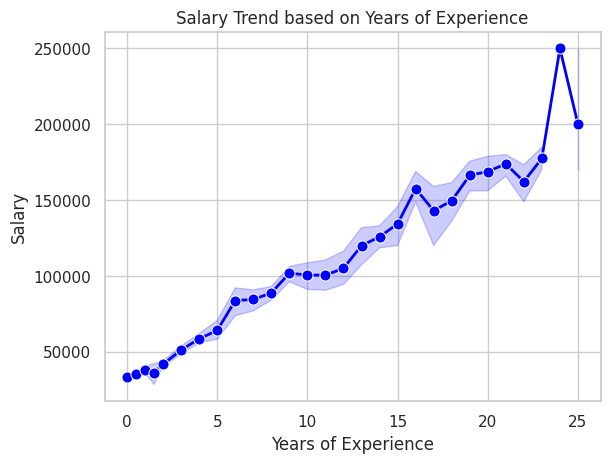

In [16]:
# Set the style for the plot
sns.set_style('whitegrid')

# Create the line plot
sns.lineplot(x='Years of Experience', y='Salary', data=df, marker='o', markersize=8, color='blue', linewidth=2)

# Set axis labels and title
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary Trend based on Years of Experience')

# Show the plot
plt.show()


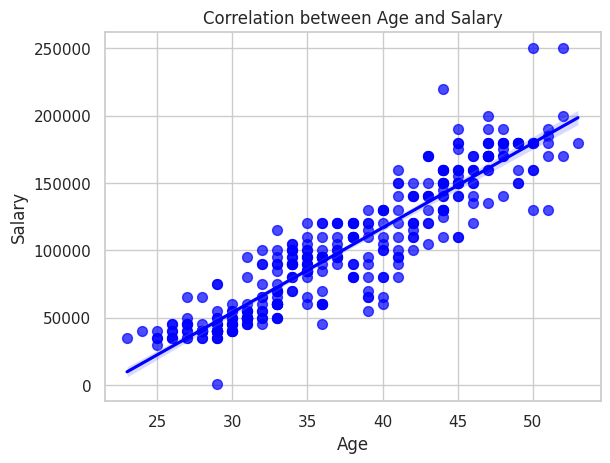

In [17]:
# Set the style for the plot
sns.set_style('whitegrid')

# Create the scatter plot with regression line
sns.regplot(x='Age', y='Salary', data=df, scatter_kws={'s': 50, 'color': 'blue', 'alpha': 0.7}, line_kws={'color': 'blue'})

# Set axis labels and title
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Correlation between Age and Salary')

# Show the plot
plt.show()


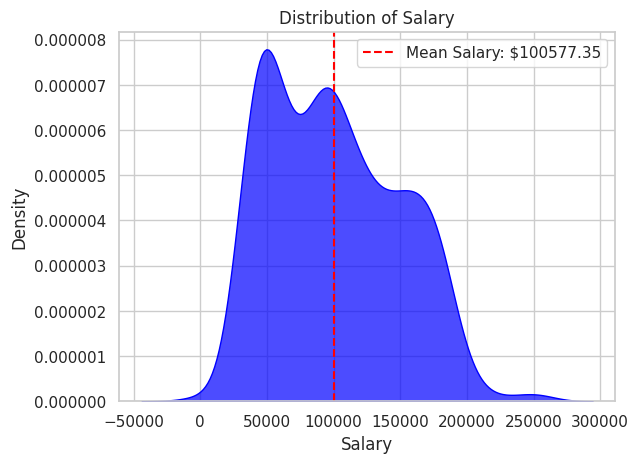

In [13]:
# Set the style for the plot (optional but enhances aesthetics)
sns.set(style='whitegrid')

# Create the KDE plot
sns.kdeplot(df['Salary'], color='blue', fill=True, alpha=0.7)

# Format the tick labels on the y-axis to remove scientific notation
plt.ticklabel_format(style='plain', axis='y')

# Set axis labels and title
plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('Distribution of Salary')

# Add a vertical line for the mean (optional, but informative)
mean_salary = df['Salary'].mean()
plt.axvline(mean_salary, color='red', linestyle='--', label=f'Mean Salary: ${mean_salary:.2f}')
plt.legend()

# Show the plot
plt.show()


In [8]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Education Level'] = label_encoder.fit_transform(df['Education Level'])
df['Job Title'] = label_encoder.fit_transform(df['Job Title'])

In [9]:
# Step 3: Split data into features and target variable
X = df.drop(columns=['Salary'])
y = df['Salary']

# Step 4: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Step 5: Train different Regression Models

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_y_pred = linear_model.predict(X_test)

# Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)
decision_tree_y_pred = decision_tree_model.predict(X_test)

# Random Forest Regressor
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
random_forest_y_pred = random_forest_model.predict(X_test)

# Step 6: Evaluate the Models

def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"Model: {model_name}")
    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
    print("\n")

evaluate_model(y_test, linear_y_pred, "Linear Regression")
evaluate_model(y_test, decision_tree_y_pred, "Decision Tree Regressor")
evaluate_model(y_test, random_forest_y_pred, "Random Forest Regressor")

Model: Linear Regression
Mean Absolute Error: 10928.921486231397
Mean Squared Error: 249075656.42722148
R-squared: 0.8961138207821864


Model: Decision Tree Regressor
Mean Absolute Error: 10866.666666666666
Mean Squared Error: 286333333.3333333
R-squared: 0.8805741339423419


Model: Random Forest Regressor
Mean Absolute Error: 8685.382666666666
Mean Squared Error: 158747092.0926
R-squared: 0.933788676517019


